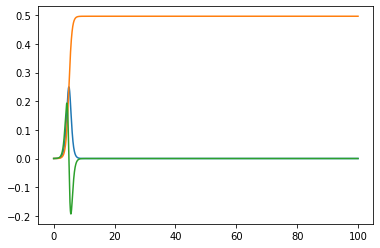

In [7]:
import numpy as np


def periodic(h,wave_period,wave_height):
    k0 = 1.
    e = 1.
    while e > 1.e-7:
        k1 = k0-(k0*np.tanh(k0*h)-(2.*np.pi/wave_period)**2/9.81)/(np.tanh(k0*h)+k0-k0*(np.tanh(k0*h))**2)
        e = abs((k1-k0)/k0)
        hs = 2.*(np.cosh(2.*k1*h)-1.)/(np.sinh(2.*k1*h)+2*k1*h)
        s = wave_height/hs
        wave_amplitude = 0.5*s
        k0 = k1
    return wave_amplitude


def solitary(h0,wave_H,g,total_step,dt):
    alpha = wave_H/h0
    wave_K = (3./4.*alpha)**0.5
    wave_K = wave_K*(1.-.625*alpha+.554688*alpha**2-.561535*alpha**3+.567095*alpha**4-.602969*alpha**5 \
                   +.624914*alpha**6-.670850*alpha**7+.700371*alpha**8)
    wave_C = 1.+alpha
    wave_C = wave_C-.05*alpha**2-.0428571*alpha**3-.0342857*alpha**4-.0315195*alpha**5-.0292784*alpha**6 \
    -.0268451*alpha**7-.0302634*alpha**8-.0219347*alpha**9
    wave_K = wave_K/h0
    wave_C = wave_C**0.5*(g*h0)**0.5
    
    x0 = -5.*wave_C
    x = 0.
    
    vel = np.zeros(total_step)
    for step in range(total_step):
        vel[step] = wmbc(alpha,total_step,step,dt,wave_H,wave_K,wave_C,h0,x0,x,g)
    
    [dis,acc] = get_wmk_dis_acc(total_step,vel,dt)

    return dis,vel,acc

def get_wmk_dis_acc(total_step,vel,dt):
    dis = np.zeros(total_step)
    acc = np.zeros(total_step)
    for j in range(total_step):
        dis[j] = dis[j-1]+0.5*dt*(vel[j-1]+vel[j])
        if j == total_step-1:
            acc[j]=acc[j-1]
        elif j == 0:
            acc[j] = (vel[j+1]-vel[j])/dt
        else:
            acc[j]=0.5*(vel[j+1]-vel[j-1])/dt
    return dis,acc

def wmbc(alpha,total_step,step,dt,wave_H,wave_K,wave_C,h0,x0,x,g):
    t = step*dt
    kk = wave_K*h0
    cc = wave_C/(g*h0)**0.5
    xxx = x
    XX = (xxx-x0-wave_C*t)/h0
    S = 1./np.cosh(kk*XX)
    zeta = S**2*alpha
    zeta = zeta+(-.75*S**2+.75*S**4)*alpha**2
    zeta = zeta+(.625*S**2-1.8875*S**4+1.2625*S**6)*alpha**3
    zeta = zeta+(-1.36817*S**2+3.88033*S**4-4.68304*S**6+2.17088*S**8)*alpha**4
    zeta = zeta+(1.86057*S**2-7.45136*S**4+12.7637*S**6-11.4199*S**8+4.24687*S**10)*alpha**5
    zeta = zeta+(-2.57413*S**2+13.2856*S**4-31.1191*S**6+40.1068*S**8-28.4272*S**10+8.728*S**12)*alpha**6
    zeta = zeta+(3.4572*S**2-22.782*S**4+68.258*S**6-116.974*S**8+120.49*S**10-71.057*S**12+18.608*S**14)*alpha**7
    zeta = zeta+(-4.6849*S**2+37.67*S**4-139.28*S**6+301.442*S**8-411.416*S**10+355.069*S**12-180.212*S**14+41.412*S**16)*alpha**8
    zeta = zeta+(6.191*S**2-60.57*S**4+269.84*S**6-712.125*S**8+1217.98*S**10-1384.37*S**12+1023.07*S**14-450.29*S**16+90.279*S**18)*alpha**9
    zeta = zeta*h0
    vel = wave_C*zeta/(h0+zeta)
    return vel

from matplotlib import pyplot as plt
#periodic(0.3,2.01975,0.02)
h0 = 0.7
wave_H = 0.07
dt = 0.001
total_step = int(100/dt)
g = 9.81
time = np.linspace(0.,100,total_step)
[dis,vel,acc] = solitary(h0,wave_H,g,total_step,dt)
plt.plot(time,vel,time,dis,time,acc)

